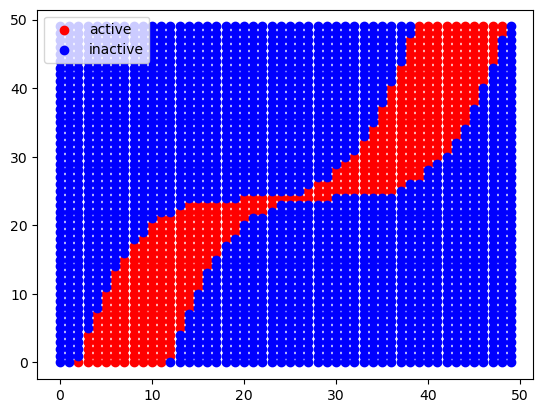

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# explosive mines points 
# active = explosive, inactive = dud (not explosive)
active_x =[]
active_y =[]
inactive_x =[]
inactive_y =[]

def add_point(point: tuple[int, int], is_active: bool):
    if is_active:
        active_x.append(point[0])
        active_y.append(point[1])
    else:
        inactive_x.append(point[0])
        inactive_y.append(point[1])

def f(x):
    return int(1/250 * math.pow((x-25), 3) + 25)

for x in range(50):
    for y in range(50):
        r = range(f(x - 5), f(x + 5))
        is_active = True if (y in r) else False
        add_point(point=(x,y), is_active=is_active)

plt.scatter(active_x, active_y, c='r', label='active')
plt.scatter(inactive_x, inactive_y, c='b', label='inactive')
plt.legend(loc=2)
plt.show()

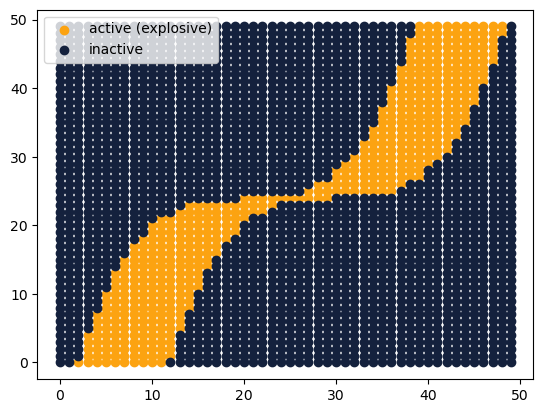

array([['active', '2', '0'],
       ['active', '3', '0'],
       ['active', '3', '1'],
       ...,
       ['inactive', '49', '47'],
       ['inactive', '49', '48'],
       ['inactive', '49', '49']], dtype='<U21')

In [61]:
active_data = []
inactive_data = []
data = [] # [label, x, y]

for (x_index, x) in enumerate(active_x):
    active_data.append(['active', x, active_y[x_index]])

for (x_index, x) in enumerate(inactive_x):
    inactive_data.append(['inactive', x, inactive_y[x_index]])


data = np.concatenate((active_data, inactive_data), axis=0)

plt.scatter(np.array(active_x).T[0:], np.array(active_y).T[0:], c='#FCA311', label='active (explosive)') # converting to arrays is stupid
plt.scatter(np.array(inactive_x).T[0:], np.array(inactive_y).T[0:], c='#14213D', label='inactive')
plt.legend(loc=2)
plt.show()

data

['active' 'active' 'active' ... 'inactive' 'inactive' 'inactive'] ['2' '3' '3' ... '49' '49' '49'] ['0' '0' '1' ... '47' '48' '49']


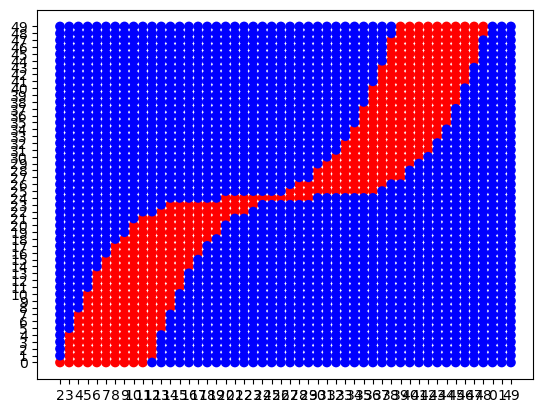

In [62]:
data = np.array(data)
labels, x_set, y_set = (data[:,0], data[:,1], data[:,2])
print(labels, x_set, y_set)
colors_col = np.where(labels == 'active', 'r', 'b')
# print(colors_col)
plt.scatter(x_set, y_set,  c=colors_col) # converting to arrays is stupid

# plt.legend(loc=2)
plt.show()


In [63]:
rows = ["{},{},{}".format(i, j, k) for i, j, k in data] 
text = "state,x,y\n" + "\n".join(rows) 
  
with open('../mines/mines_data.csv', 'w') as f: 
    f.write(text)